# MLPR Week 3 Exercises

In [253]:
import numpy as np
import matplotlib.pyplot as plt

Last week's code

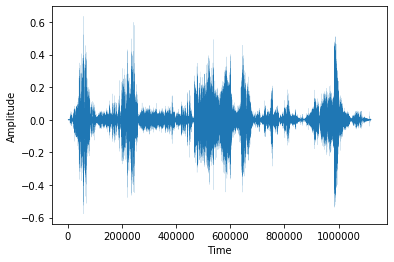

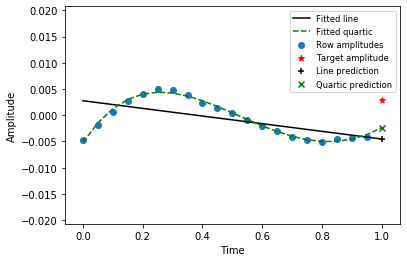

In [255]:
import numpy as np
import matplotlib.pyplot as plt

amp_data = np.load('amp_data.npz')['amp_data']

# Depending on your computer, plotting this many points
# could cause problems. Here plot only every 30th point:
plt.figure(1)
plt.plot(amp_data[::30], linewidth=0.1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.show()

plt.figure(2)
plt.hist(amp_data, bins=1000, linewidth=0)
plt.xlabel('Amplitude')
# plt.show()

# Make splits reproducible
np.random.seed(seed=42)

# Create dataset of consecutive amplitudes
n_data = amp_data.size
chunk_width = 21
n_chunks = n_data // chunk_width  # Floor division
X = np.reshape(amp_data[:chunk_width*n_chunks], (n_chunks, chunk_width))

# Split into training, validation and test sets
X_shuf = np.random.permutation(X)
train_frac, val_frac = 0.7, 0.15
train_idx = int(np.floor(train_frac * n_chunks))
val_idx = train_idx + int(np.floor(val_frac * n_chunks))
X_shuf_train = X_shuf[:train_idx, :-1]
y_shuf_train = X_shuf[:train_idx, -1]
X_shuf_val = X_shuf[train_idx:val_idx, :-1]
y_shuf_val = X_shuf[train_idx:val_idx, -1]
X_shuf_test = X_shuf[val_idx:, :-1]
y_shuf_test = X_shuf[val_idx:, -1]

# Get training row
x_row = X_shuf_train[np.random.randint(X_shuf_train.shape[0])]
y_row = y_shuf_train[np.random.randint(X_shuf_train.shape[0])]
tt = np.arange(0, 1, 1/20)

# Fit straight line
t_linear = np.array([tt**0, tt**1]).T
w_linear = np.linalg.lstsq(t_linear, x_row, rcond=None)[0]
 
# Fit quartic polynomial
t_quartic = np.array([tt**0, tt**1, tt**2, tt**3, tt**4]).T
w_quartic = np.linalg.lstsq(t_quartic, x_row, rcond=None)[0]

# Plot fitted line with points
t_plot = np.arange(0, 1 + 1./20, 1./20)
t_plot_linear = np.vstack([t_linear, np.ones(2)])
t_plot_quartic =  np.vstack([t_quartic, np.ones(5)])
linear_pred = t_plot_linear.dot(w_linear)
quartic_pred = t_plot_quartic.dot(w_quartic)
plt.clf()
plt.scatter(tt, x_row, label='Row amplitudes')
plt.scatter(1, y_row, color='r', marker='*', label='Target amplitude')
plt.plot(t_plot, linear_pred, 'k-', label='Fitted line')
plt.scatter(1, linear_pred[-1], color='k', marker='+', label='Line prediction')
plt.plot(t_plot, quartic_pred, 'g--', label='Fitted quartic')
plt.scatter(1, quartic_pred[-1], color='g', marker='x', label='Quartic prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(fontsize='small')
# plt.show()

## Question 1

### Question 1.b.i

In [4]:
def Phi(C, K):
    matrix = []
    for c in range(C):
        row = []
        t = (c)/C
        for k in range(K):
            row.append(t**k)
        matrix.append(row)
    return np.array(matrix)

In [5]:
Phi(5, 4)

array([[1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.2  , 0.04 , 0.008],
       [1.   , 0.4  , 0.16 , 0.064],
       [1.   , 0.6  , 0.36 , 0.216],
       [1.   , 0.8  , 0.64 , 0.512]])

### Question 1.b.ii

In [6]:
def make_vv(C, K):
    phi = Phi(C, K)
    phi_t_one = [[1.0]] * K
    a = np.matmul(phi.transpose(), phi)
    b = np.matmul(phi, np.linalg.inv(a))
    v = np.matmul(b, phi_t_one)
    return v

In [7]:
make_vv(5, 4)

array([[-0.8],
       [ 2.2],
       [-0.8],
       [-2.8],
       [ 3.2]])

### Question 1.b.iii

In [12]:
v = make_vv(20, 2)
np.dot(v.transpose(), X_shuf_train[0])

array([0.03675136])

In [13]:
v = make_vv(20, 5)
np.dot(v.transpose(), X_shuf_train[0])

array([0.02999207])

In [14]:
row_x = X_shuf_train[0]
y_pred_quartic = np.dot(make_vv(20,5).transpose(), row_x)
y_pred_linear = np.dot(make_vv(20,2).transpose(), row_x)

print(y_pred_quartic)
print(y_pred_linear)

[0.02999207]
[0.03675136]


In [92]:
# from week2_solutions import x_row, linear_pred, quartic_pred

y_pred_quartic = np.dot(make_vv(20,5).transpose(), x_row)
y_pred_linear = np.dot(make_vv(20,2).transpose(), x_row)

print(np.isclose(y_pred_quartic, quartic_pred[-1]))  # Out = [ True]
print(np.isclose(y_pred_linear, linear_pred[-1]))    # Out = [ True]

[ True]
[ True]


### Question 1.c.i

In [21]:
X_shuf_train[0]

array([9.15527344e-05, 1.25122070e-03, 2.68554688e-03, 4.27246094e-03,
       5.95092773e-03, 8.05664062e-03, 1.01013184e-02, 1.27258301e-02,
       1.48315430e-02, 1.74255371e-02, 1.98059082e-02, 2.21252441e-02,
       2.42614746e-02, 2.60925293e-02, 2.76184082e-02, 2.89306641e-02,
       2.96325684e-02, 3.04260254e-02, 3.06396484e-02, 3.08532715e-02])

In [22]:
y_shuf_train[0]

0.0303955078125

In [257]:
# Generate a list of c, k pairs
pair_list = []
for i in range(1,21):
    for k in range(1,21):
        pair_list.append((i,k))

# Generate a list of v vectors from the c, k pairs
v_list = []
for c, k in pair_list:
    try:
        v = make_vv(c, k)
        v_list.append(((c, k), v))
    except:
        continue

# Compute the error for each of the v vectors
errors = []
for (c, k), v in v_list:
    A = len(v)
    y_pred = np.matmul(X_shuf_train[:, -A:], v).transpose()
    square_error = np.sum(np.subtract(y_shuf_train, y_pred)**2)
    errors.append(((c, k), square_error))

# Report the c, k pairs that yield the least error
((c, k), square_error) = sorted(errors, key=lambda x: x[1])[0]
print('C = ' + str(c))
print('K = ' + str(k))
print('square_error = ' + str(square_error))

C = 2
K = 2
square_error = 15.465414167381823


In [38]:
sorted(errors, key=lambda x: x[1])[0:10]

[((2, 2), 15.465414167381823),
 ((3, 3), 21.82757766731083),
 ((3, 2), 28.17039372782334),
 ((4, 3), 29.170565262204104),
 ((5, 3), 36.91728908061939),
 ((1, 1), 41.60210201423615),
 ((4, 2), 44.2894396248739),
 ((6, 3), 47.75523671998578),
 ((4, 4), 51.246628891677226),
 ((5, 4), 51.71243437513356)]

In [14]:
sorted(errors, key=lambda x: x[1])[0:10]

[((2, 2), 15.465414167381823),
 ((3, 3), 21.82757766731083),
 ((3, 2), 28.17039372782334),
 ((4, 3), 29.170565262204104),
 ((5, 3), 36.91728908061939),
 ((1, 1), 41.60210201423615),
 ((4, 2), 44.2894396248739),
 ((6, 3), 47.75523671998578),
 ((4, 4), 51.246628891677226),
 ((5, 4), 51.71243437513356)]

### Question 1.c.ii

In [22]:
c = 2
k = 2

v = make_vv(c, k)
A = len(v)

train_pred = np.matmul(X_shuf_train[:, -A:], v).transpose()
train_mse = np.mean(np.subtract(y_shuf_train, train_pred)**2)

val_pred = np.matmul(X_shuf_val[:, -A:], v).transpose()
val_mse = np.mean(np.subtract(y_shuf_val, val_pred)**2)

test_pred = np.matmul(X_shuf_test[:, -A:], v).transpose()
test_mse = np.mean(np.subtract(y_shuf_test, test_pred)**2)

print("Mean-squared Error for Training Set: " + str(train_mse))
print("Mean-squared Error for Validation Set: " + str(val_mse))
print("Mean-squared Error for Testing Set: " + str(test_mse))

Mean-squared Error for Training Set: 1.3762020126254653e-05
Mean-squared Error for Validation Set: 1.3000225007157304e-05
Mean-squared Error for Testing Set: 1.2965968796756497e-05


Some in-line questions from the notes

In [46]:
import math 

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def finite_difference(fn, w, e=10**-5):
    return (fn(w+(e/2)) - fn(w-(e/2))) / e

all_bools = []

for i in range(0,1000):
    all_bools.append(np.isclose(sigmoid(i)*(1 - sigmoid(i)), finite_difference(sigmoid, i)))
    
all(all_bools)  # Out = True
# This means that for all the values from 0-1000, the logistic sigmoid derivative = finite difference

True

## Question 2

### Question 2.a (without bias)

In [241]:
train_errors = []
val_errors = []

for c in range(1,21):
    
    # Training set
    phi_linear_train = X_shuf_train[:, -c:]
    w_fit = np.linalg.lstsq(phi_linear_train, y_shuf_train, rcond=None)[0].reshape(-1, 1)
    y_pred_train = np.matmul(phi_linear_train, w_fit).transpose()
    mean_square_error_train = np.mean(np.subtract(y_shuf_train, y_pred_train)**2)
    train_errors.append((c, mean_square_error_train))
    
    # Validation set
    phi_linear_val = X_shuf_val[:, -c:]
    y_pred_val = np.matmul(phi_linear_val, w_fit).transpose()
    mean_square_error_val = np.mean(np.subtract(y_shuf_val, y_pred_val)**2)
    val_errors.append((c, mean_square_error_val))

# Report the results for the training set
c_train, least_mean_square_error_train = sorted(train_errors, key=lambda x: x[1])[0]
print('Training set C = ' + str(c_train))
print('Training set least MSE = ' + str(least_mean_square_error_train))

# Report the results for the validation set
c_val, least_mean_square_error_val = sorted(val_errors, key=lambda x: x[1])[0]
print('Validation set C = ' + str(c_val))
print('Validation set least MSE = ' + str(least_mean_square_error_val))

Training set C = 20
Training set least MSE = 7.8823364527474e-06
Validation set C = 18
Validation set least MSE = 7.554087057969847e-06


### Question 2.a (with bias)

In [240]:
train_errors = []
val_errors = []

for c in range(1,21):
    
    # Training set
    X_shuf_train_c = X_shuf_train[:, -c:]
    phi_linear_train = np.hstack([np.ones((X_shuf_train_c.shape[0], 1)), X_shuf_train_c])
    # phi_linear_train = X_shuf_train_c
    w_fit = np.linalg.lstsq(phi_linear_train, y_shuf_train, rcond=None)[0].reshape(-1, 1)
    y_pred_train = np.matmul(phi_linear_train, w_fit).transpose()
    mean_square_error_train = np.mean(np.subtract(y_shuf_train, y_pred_train)**2)
    train_errors.append((c, mean_square_error_train))
    
    # Validation set
    X_shuf_val_c = X_shuf_val[:, -c:]
    phi_linear_val = np.hstack([np.ones((X_shuf_val_c.shape[0], 1)), X_shuf_val_c])
    # phi_linear_val = X_shuf_val_c
    y_pred_val = np.matmul(phi_linear_val, w_fit).transpose()
    mean_square_error_val = np.mean(np.subtract(y_shuf_val, y_pred_val)**2)
    val_errors.append((c, mean_square_error_val))

# Report the results for the training set
c_train, least_mean_square_error_train = sorted(train_errors, key=lambda x: x[1])[0]
print('Training set C = ' + str(c_train))
print('Training set least MSE = ' + str(least_mean_square_error_train))

# Report the results for the validation set
c_val, least_mean_square_error_val = sorted(val_errors, key=lambda x: x[1])[0]
print('Validation set C = ' + str(c_val))
print('Validation set least MSE = ' + str(least_mean_square_error_val))

Training set C = 20
Training set least MSE = 7.882324671862859e-06
Validation set C = 18
Validation set least MSE = 7.554112507202984e-06


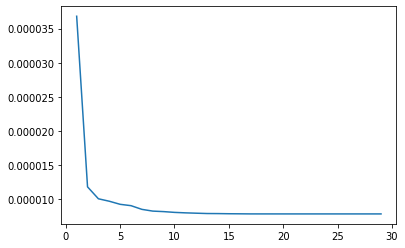

In [116]:
plt.plot([x for x, y in train_errors], [y for x, y in train_errors])

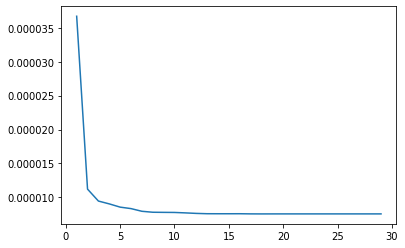

In [117]:
plt.plot([x for x, y in val_errors], [y for x, y in val_errors])

### Question 2.b (with bias)

In [242]:
# Optimal context length C from validation set is c = 18
# Get the last 18 points
phi_linear_train = np.hstack([np.ones((X_shuf_train[:, -18:].shape[0], 1)), X_shuf_train[:, -18:]])
phi_linear_test = np.hstack([np.ones((X_shuf_test[:, -18:].shape[0], 1)), X_shuf_test[:, -18:]])
    
w_fit = np.linalg.lstsq(phi_linear_train, y_shuf_train, rcond=None)[0].reshape(-1, 1)
y_pred_linear = np.matmul(phi_linear_test, w_fit).transpose()
square_error_linear = np.mean(np.subtract(y_shuf_test, y_pred_linear)**2) 

# Compare with the best polynomial model in Question 1
question1_model = make_vv(2,2)
y_pred_test = np.matmul(X_shuf_test[:,-2:], question1_model).transpose()
square_error_question1 = np.mean(np.subtract(y_shuf_test, y_pred_test)**2) 

print('Linear model MSE = ' + str(square_error_linear))
print('Polynomial model MSE = ' + str(square_error_question1))

Linear model MSE = 7.2739354468047905e-06
Polynomial model MSE = 1.2965968796756497e-05


### Question 2.a (without bias)

In [248]:
# Optimal context length C from validation set is c = 18
# Get the last 18 points
phi_linear_train = X_shuf_train[:, -18:]
phi_linear_test = X_shuf_test[:, -18:]

w_fit = np.linalg.lstsq(phi_linear_train, y_shuf_train, rcond=None)[0].reshape(-1, 1)
y_pred_linear = np.matmul(phi_linear_test, w_fit).transpose()
square_error_linear = np.mean(np.subtract(y_shuf_test, y_pred_linear)**2) 

# Compare with the best polynomial model in Question 1
question1_model = make_vv(2,2)
y_pred_test = np.matmul(X_shuf_test[:,-2:], question1_model).transpose()
square_error_question1 = np.mean(np.subtract(y_shuf_test, y_pred_test)**2) 

print('Linear model MSE = ' + str(square_error_linear))
print('Polynomial model MSE = ' + str(square_error_question1))

Linear model MSE = 7.27392879656876e-06
Polynomial model MSE = 1.2965968796756497e-05


## Question 3

In [191]:
import numpy as np
import matplotlib.pyplot as plt

amp_data = np.load('amp_data.npz')['amp_data']

# Make splits reproducible
np.random.seed(seed=42)

n_data = amp_data.size

chunk_width = 21

n_chunks = n_data // chunk_width

X = np.reshape(amp_data[:chunk_width*n_chunks], (n_chunks, chunk_width))

X_shuf = np.random.permutation(X)

train_frac, val_frac = 0.7, 0.15

# train_idx = int(np.floor(train_frac * n_chunks))
val_idx = train_idx + int(np.floor(val_frac * n_chunks))

X_shuf_train = X_shuf[:val_idx, :-1]
y_shuf_train = X_shuf[:val_idx, -1]

X_shuf_test = X_shuf[val_idx:, :-1]
y_shuf_test = X_shuf[val_idx:, -1]

phi_linear_train = np.hstack([np.ones((X_shuf_train[:, -18:].shape[0], 1)), X_shuf_train[:, -18:]])
phi_linear_test = np.hstack([np.ones((X_shuf_test[:, -18:].shape[0], 1)), X_shuf_test[:, -18:]])

w_fit = np.linalg.lstsq(phi_linear_train, y_shuf_train, rcond=None)[0].reshape(-1, 1)
y_pred_linear = np.matmul(phi_linear_test, w_fit).transpose()
square_error_linear = np.mean(np.subtract(y_shuf_test, y_pred_linear)**2) 

print(square_error_linear)

7.402957930699894e-06


In [215]:
X_shuf_train.shape

(1242068, 18)

### Question 3 Final Answer

The only way I can think of improving this model is to expose the model to more training data. Section 5 of the Week 2 part A notes on 'Training, Testing, and Evaluating Different Models' says that *"given that we want to use as much data for training as possible, we could consider combining our training and validation sets after making model choices (basis functions, regularization constants, etc.) and refit."*

In our case, we have successfully identified the best model (the linear model) and the parameters that optimize that model (c=18). So, we can combine our training and validation set and refit the model. The resulting Mean Square Error is 7.270366669743545e-06, which is incrementally lower than 7.27392879656876e-06. 

Another way that came into mind was to add a bias, but when I tried it out the error did not reduce. I was unsure whether or not the question allows me to combine two different methods so I just decided to stick with expanding the training set by concatenating the validation set.

Below is the code used for my evaluation procedure:

In [250]:
X_train = np.concatenate((X_shuf_train, X_shuf_val))
y_train = np.concatenate((y_shuf_train, y_shuf_val))

phi_linear_train = X_train[:, -18:]
phi_linear_test = X_shuf_test[:, -18:]

w_fit = np.linalg.lstsq(phi_linear_train, y_train, rcond=None)[0].reshape(-1, 1)
y_pred_linear = np.matmul(phi_linear_test, w_fit).transpose()
square_error_linear = np.mean(np.subtract(y_shuf_test, y_pred_linear)**2) 

print(square_error_linear)

7.270366669743545e-06


-----------

Try with bias

In [251]:
X_train = np.concatenate((X_shuf_train, X_shuf_val))
y_train = np.concatenate((y_shuf_train, y_shuf_val))

phi_linear_train = np.hstack([np.ones((X_train[:, -18:].shape[0], 1)), X_train[:, -18:]])
phi_linear_test = np.hstack([np.ones((X_shuf_test[:, -18:].shape[0], 1)), X_shuf_test[:, -18:]])

w_fit = np.linalg.lstsq(phi_linear_train, y_train, rcond=None)[0].reshape(-1, 1)
y_pred_linear = np.matmul(phi_linear_test, w_fit).transpose()
square_error_linear = np.mean(np.subtract(y_shuf_test, y_pred_linear)**2) 

print(square_error_linear)

7.270369811905395e-06


In [252]:
 (7.270366669743545e-06 - 7.27392879656876e-06) * 100 / 7.27392879656876e-06

-0.04897115334557171

In [249]:
7.270369811905395e-06 > 7.270366669743545e-06

True

In [194]:
import numpy as np
import matplotlib.pyplot as plt

amp_data = np.load('amp_data.npz')['amp_data']

# Make splits reproducible
np.random.seed(seed=42)

n_data = amp_data.size
chunk_width = 21
n_chunks = n_data // chunk_width

X = np.reshape(amp_data[:chunk_width*n_chunks], (n_chunks, chunk_width))
X_shuf = np.random.permutation(X)

train_frac, val_frac = 0.7, 0.15
val_idx = train_idx + int(np.floor(val_frac * n_chunks))
print(val_idx / len(X))

X_shuf_train = X_shuf[:val_idx, :-1]
y_shuf_train = X_shuf[:val_idx, -1]

X_shuf_test = X_shuf[val_idx:, :-1]
y_shuf_test = X_shuf[val_idx:, -1]

phi_linear_train = np.hstack([np.ones((X_shuf_train[:, -18:].shape[0], 1)), X_shuf_train[:, -18:]])
phi_linear_test = np.hstack([np.ones((X_shuf_test[:, -18:].shape[0], 1)), X_shuf_test[:, -18:]])

w_fit = np.linalg.lstsq(phi_linear_train, y_shuf_train, rcond=None)[0].reshape(-1, 1)
y_pred_linear = np.matmul(phi_linear_test, w_fit).transpose()
square_error_linear = np.mean(np.subtract(y_shuf_test, y_pred_linear)**2) 

print(square_error_linear)

0.8499994393899566
7.270369811905395e-06


Try with changing `chunk_width = 21` to `chunk_width = 19`

In [236]:
amp_data = np.load('amp_data.npz')['amp_data']

np.random.seed(seed=42)

n_data = amp_data.size
        
chunk_width = 19
 
n_chunks = n_data // chunk_width  # Floor division
 
X = np.reshape(amp_data[:chunk_width*n_chunks], (n_chunks, chunk_width))
 
X_shuf = np.random.permutation(X)
 
train_frac, val_frac = 0.7, 0.15
 
train_idx = int(np.floor(train_frac * n_chunks))
 
val_idx = train_idx + int(np.floor(val_frac * n_chunks))
 
X_shuf_train = X_shuf[:train_idx, :-1]
y_shuf_train = X_shuf[:train_idx, -1]
X_shuf_val = X_shuf[train_idx:val_idx, :-1]
y_shuf_val = X_shuf[train_idx:val_idx, -1]
X_shuf_test = X_shuf[val_idx:, :-1]
y_shuf_test = X_shuf[val_idx:, -1]

# Combine train and validation 
# X_shuf_train_val = np.concatenate((X_shuf_train, X_shuf_val))
# y_shuf_train_val = np.concatenate((y_shuf_train, y_shuf_val))

phi_linear = np.hstack([np.ones((X_shuf_train.shape[0],1)), X_shuf_train])
phi_linear_test= np.hstack([np.ones((X_shuf_test.shape[0],1)), X_shuf_test])
 
w_fit = np.linalg.lstsq(phi_linear, y_shuf_train, rcond=None)[0].reshape(-1, 1)
 
y_pred_test = np.matmul(phi_linear_test, w_fit).transpose()
 
square_error_train = np.sum(np.subtract(y_shuf_test,y_pred_test)**2)/y_shuf_test.shape[0]
 
print(square_error_train)

8.007395208903748e-06
